In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter('ignore')
import sqlite3

In [24]:
Sales_connection= sqlite3.connect("go_sales.sqlite")
Crm_connection= sqlite3.connect("go_crm.sqlite")
newQuery = "SELECT * FROM sales_branch"
sales_branch = pd.read_sql(newQuery,Sales_connection)

newQuery = "SELECT * FROM country"
country_crm = pd.read_sql(newQuery,Crm_connection)

In [25]:
df = pd.merge(sales_branch, country_crm, on='COUNTRY_CODE', how='inner')
df = merged_table[['REGION', 'COUNTRY_CODE', 'SALES_TERRITORY_CODE']]
df


,REGION,COUNTRY_CODE,SALES_TERRITORY_CODE
0,None,2,6
1,None,2,6
2,None,10,5
3,Alberta,4,1
4,Ontario,4,1
5,Massachusetts,3,1
6,Washington,3,1
7,California,3,1
8,Florida,3,1
9,None,1,6


In [26]:
df.dtypes

REGION                  object
COUNTRY_CODE            object
SALES_TERRITORY_CODE    object
dtype: object

In [27]:
df = pd.get_dummies(df)
df

,REGION_Alberta,REGION_California,REGION_Florida,REGION_Massachusetts,REGION_México,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,...,COUNTRY_CODE_5,COUNTRY_CODE_6,COUNTRY_CODE_7,COUNTRY_CODE_8,COUNTRY_CODE_9,SALES_TERRITORY_CODE_1,SALES_TERRITORY_CODE_4,SALES_TERRITORY_CODE_5,SALES_TERRITORY_CODE_6,SALES_TERRITORY_CODE_7
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [43]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
prediction_results = kmeans.fit_predict(df)
prediction_results

array([1, 1, 4, 2, 2, 2, 2, 2, 2, 1, 0, 3, 3, 3, 3, 0, 4, 3, 3, 3, 1, 1,
       1, 1, 3, 1, 3, 4])

In [44]:
df['Centrum'] = prediction_results
df

,REGION_Alberta,REGION_California,REGION_Florida,REGION_Massachusetts,REGION_México,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,...,COUNTRY_CODE_6,COUNTRY_CODE_7,COUNTRY_CODE_8,COUNTRY_CODE_9,SALES_TERRITORY_CODE_1,SALES_TERRITORY_CODE_4,SALES_TERRITORY_CODE_5,SALES_TERRITORY_CODE_6,SALES_TERRITORY_CODE_7,Centrum
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,4
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,2
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2
8,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1


hiertussen


In [45]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
prediction_results = kmeans.fit_predict(df)
prediction_results

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1])

In [46]:
kmeans_centra = pd.DataFrame(kmeans.cluster_centers_)
kmeans_centra

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,6.250000e-02,6.250000e-02,6.250000e-02,6.250000e-02,6.250000e-02,6.938894e-18,6.250000e-02,6.938894e-18,6.250000e-02,6.938894e-18,...,6.938894e-18,6.938894e-18,6.250000e-02,1.250000e-01,5.000000e-01,-2.775558e-17,-1.387779e-17,5.000000e-01,-1.387779e-17,1.25
1,1.387779e-17,1.387779e-17,1.387779e-17,1.387779e-17,1.387779e-17,8.333333e-02,1.387779e-17,8.333333e-02,1.387779e-17,8.333333e-02,...,8.333333e-02,8.333333e-02,1.387779e-17,2.775558e-17,1.110223e-16,5.000000e-01,2.500000e-01,1.110223e-16,2.500000e-01,3.25


In [47]:
for i in range(len(kmeans_centra.columns)):
    kmeans_centra = kmeans_centra.rename(columns = {i : f'{df.columns[i]}'})
    
kmeans_centra

,REGION_Alberta,REGION_California,REGION_Florida,REGION_Massachusetts,REGION_México,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,...,COUNTRY_CODE_6,COUNTRY_CODE_7,COUNTRY_CODE_8,COUNTRY_CODE_9,SALES_TERRITORY_CODE_1,SALES_TERRITORY_CODE_4,SALES_TERRITORY_CODE_5,SALES_TERRITORY_CODE_6,SALES_TERRITORY_CODE_7,Centrum
0,6.250000e-02,6.250000e-02,6.250000e-02,6.250000e-02,6.250000e-02,6.938894e-18,6.250000e-02,6.938894e-18,6.250000e-02,6.938894e-18,...,6.938894e-18,6.938894e-18,6.250000e-02,1.250000e-01,5.000000e-01,-2.775558e-17,-1.387779e-17,5.000000e-01,-1.387779e-17,1.25
1,1.387779e-17,1.387779e-17,1.387779e-17,1.387779e-17,1.387779e-17,8.333333e-02,1.387779e-17,8.333333e-02,1.387779e-17,8.333333e-02,...,8.333333e-02,8.333333e-02,1.387779e-17,2.775558e-17,1.110223e-16,5.000000e-01,2.500000e-01,1.110223e-16,2.500000e-01,3.25


In [48]:
for src_index, _ in df.iterrows():
    euclidian_distances = dict()
    print(f"Afstand van bronindex {src_index} tot...")

    for centrumindex, _ in kmeans_centra.iterrows():
        print(f"\tCentrumindex {centrumindex}:")
        euclidian_sum = 0

        for column_name in kmeans_centra.columns:
            current_difference = df.at[src_index, column_name] - kmeans_centra.at[centrumindex, column_name]
            print(f'\t\t{df.at[src_index, column_name]} - {kmeans_centra.at[centrumindex, column_name]} = {current_difference}')
            euclidian_sum += current_difference ** 2
        
        print(f'\tTotale euclidische som: {euclidian_sum}')
        euclidian_distance = math.sqrt(euclidian_sum)
        print(f'\tEuclidische afstand: {euclidian_distance}')
        euclidian_distances[centrumindex] = euclidian_distance
        print('------------------------------------------------')
    
    print(euclidian_distances)
    centrum_number = min(euclidian_distances, key = euclidian_distances.get)
    print(centrum_number)
    df.at[src_index, 'Centrum'] = centrum_number
    print("================================================")

df

Afstand van bronindex 0 tot...
	Centrumindex 0:
		False - 0.06250000000000001 = -0.06250000000000001
		False - 0.0625 = -0.0625
		False - 0.06250000000000001 = -0.06250000000000001
		False - 0.0625 = -0.0625
		False - 0.06250000000000001 = -0.06250000000000001
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 0.06250000000000001 = -0.06250000000000001
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 0.0625 = -0.0625
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 0.06250000000000001 = -0.06250000000000001
		False - 0.0625 = -0.0625
		False - 0.125 = -0.125
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 1.3877787807814457e-17 = -1.3877787807814457e-17
		False - 6.938893903907228e-18 = -6.938893903907228e-18
		False - 6.938893903907228e-18 = -6.93

,REGION_Alberta,REGION_California,REGION_Florida,REGION_Massachusetts,REGION_México,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,...,COUNTRY_CODE_6,COUNTRY_CODE_7,COUNTRY_CODE_8,COUNTRY_CODE_9,SALES_TERRITORY_CODE_1,SALES_TERRITORY_CODE_4,SALES_TERRITORY_CODE_5,SALES_TERRITORY_CODE_6,SALES_TERRITORY_CODE_7,Centrum
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,0
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0
8,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0


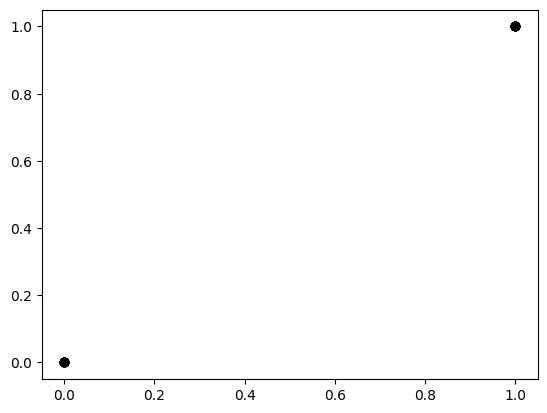

: 

In [49]:
plt.scatter(df['Centrum'] ,df['Centrum'], color = 'k')
plt.show()

In [ ]:
df.groupby('Centrum', as_index = False)['Centrum'].count()